> Our goal in this chapter is to check the relationship between the puzzle difficulty
and how much users like it. To perform this analysis, we will take the following steps:

> 1 Subset the data set to concentrate only on columns and rows that we want to analyze later.

> 2 Aggregate data about the relationship between puzzle difficulty and popularity in a data frame and plot it.

> 3 Build a local linear regression (LOESS) to obtain better summary information about relationships present in the data.

>Through this analysis, the key skill that you will obtain after studying this chapter is learning various ways for indexing into a data frame.

In [3]:
using DataFrames
using CSV
using Plots

In [4]:
puzzles = CSV.read("puzzles.csv", DataFrame, delim=','); # ; to not print dataframe to screen

┌ Warning: thread = 1 warning: parsed expected 10 columns, but didn't reach end of line around data row: 3. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:577
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 8. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 9. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 10. Filling remaining columns 

┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 34. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 35. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 36. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 37. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 38. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 39. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 90. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 91. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 92. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 93. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 94. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 95. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

In [5]:
puzzles

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1130,75,86,518,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game,Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1652,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,g5e7 a5c3 b2c3 c6e7,1436,76,86,489,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense,Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,e3g3 f7f4 e5f4 f8f4,1478,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,61,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing,missing


In [6]:
using Statistics

In [7]:
plays_lo = median(puzzles.NbPlays)

216.0

In [8]:
puzzles.NbPlays .> plays_lo

3080529-element BitVector:
 1
 1
 1
 0
 0
 1
 1
 0
 0
 0
 1
 1
 0
 ⋮
 0
 1
 1
 1
 0
 0
 1
 1
 0
 1
 0
 0

In [9]:
rating_lo = 1500

1500

In [10]:
rating_hi = quantile(puzzles.Rating, 0.99)

2689.0

In [11]:
rating_lo .< puzzles.Rating .< rating_hi

3080529-element BitVector:
 1
 1
 0
 0
 1
 0
 1
 0
 0
 1
 1
 1
 0
 ⋮
 0
 1
 1
 1
 0
 1
 0
 0
 0
 1
 1
 1

In [12]:
row_selector = (puzzles.NbPlays .> plays_lo) .&&
                      (rating_lo .< puzzles.Rating .< rating_hi)

3080529-element BitVector:
 1
 1
 0
 0
 0
 0
 1
 0
 0
 0
 1
 1
 0
 ⋮
 0
 1
 1
 1
 0
 0
 0
 0
 0
 1
 0
 0

In [13]:
count(row_selector)

739194

In [14]:
?count

search: count count! countlines count_ones count_zeros fieldcount codeunit



```
count([f=identity,] itr; init=0) -> Integer
```

Count the number of elements in `itr` for which the function `f` returns `true`. If `f` is omitted, count the number of `true` elements in `itr` (which should be a collection of boolean values). `init` optionally specifies the value to start counting from and therefore also determines the output type.

!!! compat "Julia 1.6"
    `init` keyword was added in Julia 1.6.


See also: [`any`](@ref), [`sum`](@ref).

# Examples

```jldoctest
julia> count(i->(4<=i<=6), [2,3,4,5,6])
3

julia> count([true, false, true, true])
3

julia> count(>(3), 1:7, init=0x03)
0x07
```

---

```
count(
    pattern::Union{AbstractChar,AbstractString,AbstractPattern},
    string::AbstractString;
    overlap::Bool = false,
)
```

Return the number of matches for `pattern` in `string`. This is equivalent to calling `length(findall(pattern, string))` but more efficient.

If `overlap=true`, the matching sequences are allowed to overlap indices in the original string, otherwise they must be from disjoint character ranges.

!!! compat "Julia 1.3"
    This method requires at least Julia 1.3.


!!! compat "Julia 1.7"
    Using a character as the pattern requires at least Julia 1.7.


---

```
count([f=identity,] A::AbstractArray; dims=:)
```

Count the number of elements in `A` for which `f` returns `true` over the given dimensions.

!!! compat "Julia 1.5"
    `dims` keyword was added in Julia 1.5.


!!! compat "Julia 1.6"
    `init` keyword was added in Julia 1.6.


# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> count(<=(2), A, dims=1)
1×2 Matrix{Int64}:
 1  1

julia> count(<=(2), A, dims=2)
2×1 Matrix{Int64}:
 2
 0
```


In [15]:
good = puzzles[row_selector, ["Rating", "Popularity"]]

Row,Rating,Popularity
,Int64,Int64
1,1736,95
2,1513,96
3,1574,88
4,1841,91
5,2652,90
6,1789,92
7,1971,93
8,1630,96
9,1513,94


## Exercise

*Calculate summary statistics of the NbPlays column under two conditions. In the first, select only puzzles that have popularity equal to 100, and in the second, select puzzles that have popularity equal to –100. To calculate the summary statistics of a vector, use the summarystats function from the StatsBase.jl package.*

In [18]:
import Pkg; Pkg.add("StatsBase")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [2913bbd2] + StatsBase v0.33.21
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [19]:
using StatsBase

In [20]:
?summarystats

search: summarystats



```
summarystats(a)
```

Compute summary statistics for a real-valued array `a`. Returns a `SummaryStats` object containing the mean, minimum, 25th percentile, median, 75th percentile, and maxmimum.


> You can think of DataFrameRow as a NamedTuple containing the selected cells. The only difference is that DataFrameRow retains a link to the data frame it was taken from. Technically, it is a view. Therefore, when the data frame is updated, it is reflected in the DataFrameRow. If you update the DataFrameRow, the underlying data frame would also be updated.

In [21]:
row1 = puzzles[1, ["Rating", "Popularity"]]

Row,Rating,Popularity
,Int64,Int64
1,1736,95


>  can think of DataFrameRow as a single-dimensional object. Therefore, you can get data from it exactly as from a data frame,

In [22]:
row1["Rating"]

1736

In [23]:
row1[:Rating]

1736

In [24]:
row1.Rating

1736

In [25]:
row1."Rating"

1736

In [37]:
good = puzzles[row_selector, :]

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
4,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17,d8f6 d1h5 h7h6 h5c5,1841,75,91,1721,advantage middlegame short,https://lichess.org/jcuxlI63/black#34,Scotch_Game,Scotch_Game_Mieses_Variation
5,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20,b7b6 d4a1 a7a5 f1c1,2652,103,90,1373,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,missing,missing
6,001XA,1qr2rk1/pb2bppp/8/8/2p1N3/P1Bn2P1/2Q2PBP/1R3RK1 b - - 3 23,b8c7 b1b7 c7b7 e4f6 e7f6 g2b7,1789,75,92,625,crushing discoveredAttack long master middlegame sacrifice,https://lichess.org/KZRiN695/black#46,missing,missing
7,001xO,k1r1b3/p1r1nppp/1p1qpn2/2Np4/1P1P4/PQRBPN2/5PPP/2R3K1 w - - 0 19,d3a6 b6c5 a6c8 c5c4,1971,76,93,672,crushing master masterVsMaster middlegame sacrifice short,https://lichess.org/fNCePFgY#37,Slav_Defense,Slav_Defense_Other_variations
8,00206,r3kb1r/pppqpn1p/5p2/3p1bpQ/2PP4/4P1B1/PP3PPP/RN2KB1R w KQkq - 1 11,b1c3 f5g4 h5g4 d7g4,1630,74,96,15343,advantage opening short trappedPiece,https://lichess.org/MbJRo6PT#21,Queens_Pawn_Game,Queens_Pawn_Game_Accelerated_London_System
9,002KJ,r3kb1r/ppq2ppp/4pn2/2Ppn3/1P4bP/2P2N2/P3BPP1/RNBQ1RK1 b kq - 2 10,f8e7 f3e5 c7e5 e2g4,1513,75,94,594,crushing discoveredAttack middlegame short,https://lichess.org/2NpTzh7O/black#20,Caro-Kann_Defense,Caro-Kann_Defense_Advance_Variation


In [27]:
puzzles[:, r"Rating"]

Row,Rating,RatingDeviation
,Int64,Int64
1,1736,78
2,1513,74
3,1130,75
4,1495,155
5,1652,149
6,1436,76
7,1574,76
8,1478,279
9,1039,80


In [28]:
puzzles[:, ["Rating", "Moves"]]

Row,Rating,Moves
,Int64,String
1,1736,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1
2,1513,d3d6 f8d8 d6d8 f6d8
3,1130,b6c5 e2g4 h3g4 d1g4
4,1495,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6
5,1652,e5f6 e8e1 g1f2 e1f1
6,1436,g5e7 a5c3 b2c3 c6e7
7,1574,e8f7 e2e6 f7f8 e6f7
8,1478,e3g3 f7f4 e5f4 f8f4
9,1039,a6a5 e5c7 a5b4 c7d8


In [29]:
puzzles[:, Not(["Rating", "Moves"])]

Row,PuzzleId,FEN,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,75,86,518,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game,Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,76,86,489,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense,Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,80,85,61,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing,missing


In [30]:
?Not

search: Not Nothing notify nothing isnothing annotate! insorted ignorestatus



```
InvertedIndex(idx)
Not(idx)
```

Construct an inverted index, selecting all indices not in the passed `idx`.

Upon indexing into an array, the `InvertedIndex` behaves like a 1-dimensional collection of the indices of the array that are not in `idx`. Bounds are checked to ensure that all indices in `idx` are within the bounds of the array — even though they are skipped. The `InvertedIndex` behaves like a 1-dimensional collection of its inverted indices. If `idx` spans multiple dimensions (like a multidimensional logical mask or `CartesianIndex`), then the inverted index will similarly span multiple dimensions.

When indexing into a `NamedTuple`, the `InvertedIndex` can wrap either a `Symbol`, a vector of `Symbol`s, or a tuple of `Symbol`s and selects the fields of the `NamedTuple` that are not in `idx`.


In [32]:
puzzles[:, Between(:Moves, :Popularity)]

Row,Moves,Rating,RatingDeviation,Popularity
,String,Int64,Int64,Int64
1,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95
2,d3d6 f8d8 d6d8 f6d8,1513,74,96
3,b6c5 e2g4 h3g4 d1g4,1130,75,86
4,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100
5,e5f6 e8e1 g1f2 e1f1,1652,149,100
6,g5e7 a5c3 b2c3 c6e7,1436,76,86
7,e8f7 e2e6 f7f8 e6f7,1574,76,88
8,e3g3 f7f4 e5f4 f8f4,1478,279,100
9,a6a5 e5c7 a5b4 c7d8,1039,80,85


In [40]:
good[1:5,:]

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
4,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17,d8f6 d1h5 h7h6 h5c5,1841,75,91,1721,advantage middlegame short,https://lichess.org/jcuxlI63/black#34,Scotch_Game,Scotch_Game_Mieses_Variation
5,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20,b7b6 d4a1 a7a5 f1c1,2652,103,90,1373,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,missing,missing


In [39]:
@view good[1:5,:]

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
4,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17,d8f6 d1h5 h7h6 h5c5,1841,75,91,1721,advantage middlegame short,https://lichess.org/jcuxlI63/black#34,Scotch_Game,Scotch_Game_Mieses_Variation
5,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20,b7b6 d4a1 a7a5 f1c1,2652,103,90,1373,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,missing,missing


# The relationship between puzzle difficulty and popularity

In [38]:
describe(good)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PuzzleId,,00008,,zzzco,0,String7
2,FEN,,1B1K4/2P5/4k3/2N4p/6b1/8/r6P/8 b - - 4 53,,rrq3k1/4ppbp/1n1p2p1/pN1P4/2p1P3/P3QN2/1P2RPPP/1R4K1 w - - 5 23,0,String
3,Moves,,a1a2 a3a2 b2a2 b4c4 d4d5 c4d5 a2b3 d5d4 h2h4 f6f5 b3c2 d4e3,,h8h7 h6h7 d8f6 c3e4,0,String
4,Rating,1924.79,1501,1877.0,2688,0,Int64
5,RatingDeviation,76.8155,49,75.0,195,0,Int64
6,Popularity,90.976,-40,92.0,100,0,Int64
7,NbPlays,2420.94,217,1032.0,310341,0,Int64
8,Themes,,advancedPawn advantage attackingF2F7 attraction deflection long middlegame,,opening,0,String
9,GameUrl,,https://lichess.org/0001qFHT/black#48,,https://lichess.org/zzzbA9O6/black#32,0,String


In [42]:
good[1:10,:]

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
4,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17,d8f6 d1h5 h7h6 h5c5,1841,75,91,1721,advantage middlegame short,https://lichess.org/jcuxlI63/black#34,Scotch_Game,Scotch_Game_Mieses_Variation
5,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20,b7b6 d4a1 a7a5 f1c1,2652,103,90,1373,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,missing,missing
6,001XA,1qr2rk1/pb2bppp/8/8/2p1N3/P1Bn2P1/2Q2PBP/1R3RK1 b - - 3 23,b8c7 b1b7 c7b7 e4f6 e7f6 g2b7,1789,75,92,625,crushing discoveredAttack long master middlegame sacrifice,https://lichess.org/KZRiN695/black#46,missing,missing
7,001xO,k1r1b3/p1r1nppp/1p1qpn2/2Np4/1P1P4/PQRBPN2/5PPP/2R3K1 w - - 0 19,d3a6 b6c5 a6c8 c5c4,1971,76,93,672,crushing master masterVsMaster middlegame sacrifice short,https://lichess.org/fNCePFgY#37,Slav_Defense,Slav_Defense_Other_variations
8,00206,r3kb1r/pppqpn1p/5p2/3p1bpQ/2PP4/4P1B1/PP3PPP/RN2KB1R w KQkq - 1 11,b1c3 f5g4 h5g4 d7g4,1630,74,96,15343,advantage opening short trappedPiece,https://lichess.org/MbJRo6PT#21,Queens_Pawn_Game,Queens_Pawn_Game_Accelerated_London_System
9,002KJ,r3kb1r/ppq2ppp/4pn2/2Ppn3/1P4bP/2P2N2/P3BPP1/RNBQ1RK1 b kq - 2 10,f8e7 f3e5 c7e5 e2g4,1513,75,94,594,crushing discoveredAttack middlegame short,https://lichess.org/2NpTzh7O/black#20,Caro-Kann_Defense,Caro-Kann_Defense_Advance_Variation


> For each unique value in the Rating column, we will want to calculate the average of the Popularity column. We will perform this task in two steps:

> 1 Create a dictionary, mapping a given rating value to a vector of rows in the data frame where it can be found.

> 2 Use this dictionary to compute the average popularity per each unique value of rating.

In [43]:
rating_mapping = Dict{Int, Vector{Int}}()

Dict{Int64, Vector{Int64}}()

In [44]:
for (i, rating) in enumerate(good.Rating)
    if haskey(rating_mapping, rating) 
        push!(rating_mapping[rating], i)
    else
        rating_mapping[rating] = [i]
    end
end

In [45]:
rating_mapping

Dict{Int64, Vector{Int64}} with 1188 entries:
  2108 => [1031, 1995, 7637, 8273, 9112, 9539, 11372, 12428, 13777, 15049  …  7…
  2261 => [665, 781, 1378, 2185, 7023, 7626, 9673, 12397, 13112, 13662  …  7253…
  1953 => [508, 1000, 3072, 3989, 5514, 5711, 6654, 6793, 7167, 7829  …  726045…
  2288 => [1939, 3420, 5747, 9835, 9952, 13428, 15824, 17857, 18974, 21028  …  …
  1546 => [238, 410, 795, 1087, 1934, 2642, 3198, 3746, 3976, 4192  …  733663, …
  1956 => [186, 667, 882, 2010, 3183, 3654, 6124, 8023, 8597, 11837  …  731877,…
  1703 => [384, 560, 1096, 1901, 2713, 3704, 4261, 4398, 4742, 5093  …  735568,…
  2350 => [1433, 1435, 1465, 1636, 3727, 4664, 4747, 8694, 11251, 11971  …  710…
  2493 => [6796, 13476, 13839, 19994, 20012, 20930, 26438, 26808, 26864, 31559 …
  1812 => [1761, 1984, 7385, 9093, 9401, 10651, 12493, 13115, 14029, 15195  …  …
  2291 => [106, 221, 548, 1162, 1190, 1444, 3628, 3737, 5227, 6689  …  725936, …
  2015 => [338, 3911, 4905, 6376, 10103, 13299, 13566, 13573, 1

## Exercise

> Make sure that the values stored in the rating_mapping dictionary add up to represent all row indices of our good data frame. To do this, check whether the sum of lengths of these vectors is equal to the number of rows in the good data frame

In [47]:
ratings = unique(good.Rating);

In [48]:
mean_popularities = map(ratings) do rating
   indices = rating_mapping[rating]
   popularities = good[indices, "Popularity"]
   return mean(popularities)
end

1188-element Vector{Float64}:
 91.3952802359882
 91.12307692307692
 91.42590949423247
 91.54431960049938
 89.16666666666667
 91.55621301775147
 91.37057220708446
 91.70152091254752
 91.4247572815534
 91.54901960784314
 91.42635658914729
 91.40449438202248
 91.45067497403946
  ⋮
 88.42372881355932
 88.69182389937107
 89.45887445887446
 88.70344827586207
 88.08641975308642
 88.8780487804878
 89.11258278145695
 89.46875
 89.07534246575342
 89.31927710843374
 88.94736842105263
 88.96428571428571

In [49]:
using Plots

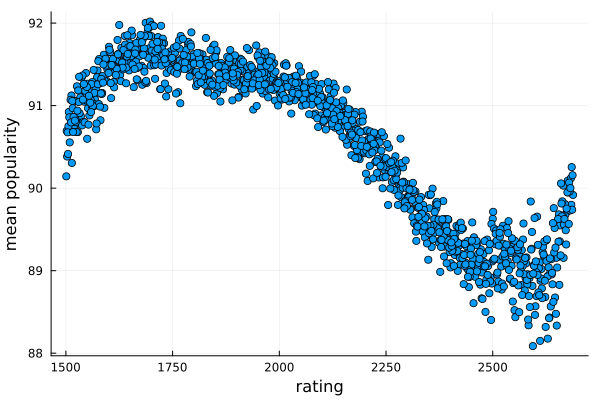

In [50]:
scatter(ratings, mean_popularities;
               xlabel="rating", ylabel="mean popularity", legend=false)

# LOESS regression

> The locally estimated scatterplot smoothing (LOESS) model was originally developed for scatterplot smoothing. You can find more information about this method in “Com- putational Methods for Local Regression” by William S. Cleveland and E. Grosse (https://doi.org/10.1007/BF01890836).
In Julia, the Loess.jl package allows you to build LOESS regression models.

https://en.wikipedia.org/wiki/Local_regression


https://en.wikipedia.org/wiki/File:Loess_curve.svg

LoadError: syntax: "//" is not a unary operator

In [52]:
import Pkg; Pkg.add("Loess")

   Resolving package versions...
   Installed Loess ─ v0.5.4
    Updating `~/.julia/environments/v1.8/Project.toml`
  [4345ca2d] + Loess v0.5.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [4345ca2d] + Loess v0.5.4
Precompiling project...
  ✓ Loess
  1 dependency successfully precompiled in 1 seconds. 205 already precompiled.


In [54]:
using Loess

In [55]:
model = loess(ratings, mean_popularities);

In [57]:
ratings_predict = float(sort(ratings))

1188-element Vector{Float64}:
 1501.0
 1502.0
 1503.0
 1504.0
 1505.0
 1506.0
 1507.0
 1508.0
 1509.0
 1510.0
 1511.0
 1512.0
 1513.0
    ⋮
 2677.0
 2678.0
 2679.0
 2680.0
 2681.0
 2682.0
 2683.0
 2684.0
 2685.0
 2686.0
 2687.0
 2688.0

I tried using

```julia
popularity_predict = predict(model, ratings_predict)
```

as per book, but correctly pointed out ambiguous, forced to qualify:

In [62]:
popularity_predict = Loess.predict(model, ratings_predict)

1188-element Vector{Float64}:
 90.93500781421727
 90.93964650847414
 90.94426516042705
 90.94886379760412
 90.95344244753353
 90.95800113774341
 90.9625398957619
 90.96705874911716
 90.97155772533733
 90.97603685195055
 90.98049615648496
 90.98493566646869
 90.98935540942992
  ⋮
 89.28542292282586
 89.2882287293308
 89.2910631590058
 89.29392626111655
 89.29681808492859
 89.2997386797076
 89.30268809471919
 89.30566637922902
 89.30867358250268
 89.3117097538058
 89.31477494240404
 89.31786919756297

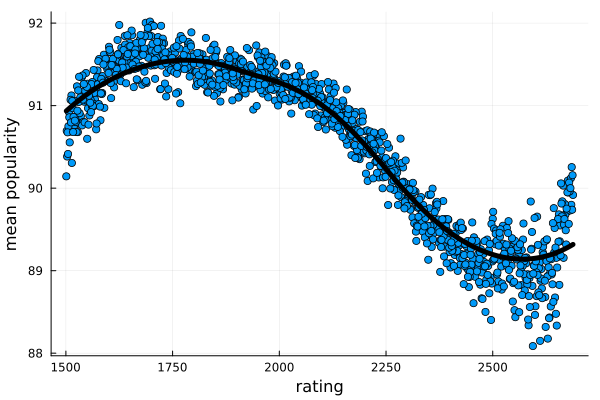

In [63]:
plot!(ratings_predict, popularity_predict; width=5, color="black")

## EXERCISE

> Check the consequences of changing the value of the span keyword argument in the loess function. By default, this argument has the value 0.75. Set it to 0.25 and add another prediction line to the plot presented in figure 9.4. Make the line yellow with its width equal to 5.

> DataFrames.jl defines a wide range of accepted column selectors that can be integers, strings, symbols, vectors, regular expressions, or :, Not, Between, Cols, or All expressions. This flexibility is needed as users often want to use complex patterns for column selection. 

> You can make views of DataFrame objects by using the @view macro exactly as you can for arrays. It is important to remember that views share memory with the parent object. Therefore, they are fast to create and do not use much mem- ory, but at the same time, you need to be careful when mutating their contents. In particular, if you select a single row and multiple columns of a data frame, you get a DataFrameRow object that is a view into a single row of a data frame.

> The Loess.jl package can be used to build local regression models. These mod- els are used when your data has nonlinear relationships between the feature and target variable.